In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score




In [2]:
data = pd.read_csv("Training.csv")

In [3]:
data.head(20)

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0         1          1                     1                    0          0   
1         0          1                     1                    0          0   
2         1          0                     1                    0          0   
3         1          1                     0                    0          0   
4         1          1                     1                    0          0   
5         0          1                     1                    0          0   
6         1          0                     1                    0          0   
7         1          1                     0                    0          0   
8         1          1                     1                    0          0   
9         1          1                     1                    0          0   
10        0          0                     0                    1          1   
11        0          0                     0                    0          1   
12        0          0                     0                    1          0   
13        0          0                     0                    1          1   
14        0          0                     0                    1          1   
15        0          0                     0                    0          1   
16        0          0                     0                    1          0   
17        0          0                     0                    1          1   
18        0          0                     0                    1          1   
19        0          0                     0                    1          1   

    chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0        0           0             0        0                 0  ...   
1        0           0             0        0                 0  ...   
2        0           0             0        0                 0  ...   
3        0           0             0        0                 0  ...   
4        0           0             0        0                 0  ...   
5        0           0             0        0                 0  ...   
6        0           0             0        0                 0  ...   
7        0           0             0        0                 0  ...   
8        0           0             0        0                 0  ...   
9        0           0             0        0                 0  ...   
10       1           0             0        0                 0  ...   
11       1           0             0        0                 0  ...   
12       1           0             0        0                 0  ...   
13       0           0             0        0                 0  ...   
14       1           0             0        0                 0  ...   
15       1           0             0        0                 0  ...   
16       1           0             0        0                 0  ...   
17       0           0             0        0                 0  ...   
18       1           0             0        0                 0  ...   
19       1           0             0        0                 0  ...   

    blackheads  scurring  skin_peeling  silver_like_dusting  \
0            0         0             0                    0   
1            0         0             0                    0   
2            0         0             0                    0   
3            0         0             0                    0   
4            0         0             0                    0   
5            0         0             0                    0   
6            0         0             0                    0   
7            0         0             0                    0   
8            0         0             0                    0   
9            0         0             0                    0   
10           0         0             0                    0   
11           0         0             0                

In [4]:
data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [5]:
data.prognosis.value_counts()

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [7]:
data.describe()

itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
mean      0.021951     0.162195     0.139024      0.045122     0.045122   
std       0.146539     0.368667     0.346007      0.207593     0.207593   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.000000     0.000000     0.000000      0.000000     0.000000   
50%       0.000000     0.000000     0.000000      0.000000     0.000000   
75%       0.000000     0.000000     0.000000      0.000000     0.000000   
max       1.000000     1.000000     1.000000      1.000000     1.000000   

       ulcers_on_tongue  ...  pus_filled_pimples   blackheads     scurring  \
count       4920.000000  ...         4920.000000  4920.000000  4920.000000   
mean           0.021951  ...            0.021951     0.021951     0.021951   
std            0.146539  ...            0.146539     0.146539     0.146539   
min            0.000000  ...            0.000000     0.000000     0.000000   
25%            0.000000  ...            0.000000     0.000000     0.000000   
50%            0.000000  ...            0.000000     0.000000     0.000000   
75%            0.000000  ...            0.000000     0.000000     0.000000   
max            1.000000  ...            1.000000     1.000000     1.000000   

       skin_peeling  silver_like_dusting  small_dents_in_nails  \
count   4920.000000          4920.000000           4920.000000   
mean       0.023171             0.023171              0.023171   
std        0.150461             0.150461              0.150461   
min        0.000000             0.000000              0.000000   
25%        0.000000             0.000000              0.000000   
50%        0.000000             0.000000              0.000000   
75%        0.000000             0.000000              0.000000   
max        1.000000             1.000000              1.000000   

       inflammatory_nails      blister  red_sore_around_nose  \
count         4920.000000  4920.000000           4920.000000   
mean             0.023171     0.023171              0.023171   
std              0.150461     0.150461              0.150461   
min              0.000000     0.000000              0.000000   
25%              0.000000     0.000000              0.000000   
50%              0.000000     0.000000              0.000000   
75%              0.000000     0.000000              0.000000   
max              1.000000     1.000000              1.000000   

       yellow_crust_ooze  
count        4920.000000  
mean            0.023171  
std             0.150461  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max             1.000000  

[8 rows x 132 columns]

In [8]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X, y = data.iloc[:,:-1], data.iloc[:,-1]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [9]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [10]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [11]:
feature_imp = pd.Series(clf.feature_importances_,index=list(data.columns[:-1])).sort_values(ascending=False).head(50)
feature_imp[::-1]


muscle_wasting               0.008867
loss_of_balance              0.008950
patches_in_throat            0.008989
pus_filled_pimples           0.008989
malaise                      0.009029
bladder_discomfort           0.009048
polyuria                     0.009140
cough                        0.009190
weakness_of_one_body_side    0.009261
fast_heart_rate              0.009274
headache                     0.009333
yellow_crust_ooze            0.009454
chills                       0.009504
rusty_sputum                 0.009758
internal_itching             0.009840
pain_behind_the_eyes         0.009875
stomach_bleeding             0.009883
sunken_eyes                  0.010047
hip_joint_pain               0.010204
breathlessness               0.010243
continuous_feel_of_urine     0.010283
abnormal_menstruation        0.010339
irritability                 0.010424
loss_of_appetite             0.010437
yellowish_skin               0.010450
abdominal_pain               0.010637
mucoid_sputu

In [12]:
feature_imp[::-1].index

Index(['muscle_wasting', 'loss_of_balance', 'patches_in_throat',
       'pus_filled_pimples', 'malaise', 'bladder_discomfort', 'polyuria',
       'cough', 'weakness_of_one_body_side', 'fast_heart_rate', 'headache',
       'yellow_crust_ooze', 'chills', 'rusty_sputum', 'internal_itching',
       'pain_behind_the_eyes', 'stomach_bleeding', 'sunken_eyes',
       'hip_joint_pain', 'breathlessness', 'continuous_feel_of_urine',
       'abnormal_menstruation', 'irritability', 'loss_of_appetite',
       'yellowish_skin', 'abdominal_pain', 'mucoid_sputum',
       'lack_of_concentration', 'red_spots_over_body', 'shivering',
       'joint_pain', 'nausea', 'diarrhoea', 'weight_loss', 'yellowing_of_eyes',
       'vomiting', 'sweating', 'altered_sensorium', 'passage_of_gases',
       'stomach_pain', 'nodal_skin_eruptions', 'dark_urine', 'chest_pain',
       'high_fever', 'family_history', 'fatigue', 'mild_fever', 'itching',
       'unsteadiness', 'muscle_pain'],
      dtype='object')

C:\Users\jeffpapa\AppData\Local\Temp\ipykernel_31812\1601417273.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_imp, y=feature_imp.index, palette='Blues_d',color='white')
C:\Users\jeffpapa\AppData\Local\Temp\ipykernel_31812\1601417273.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


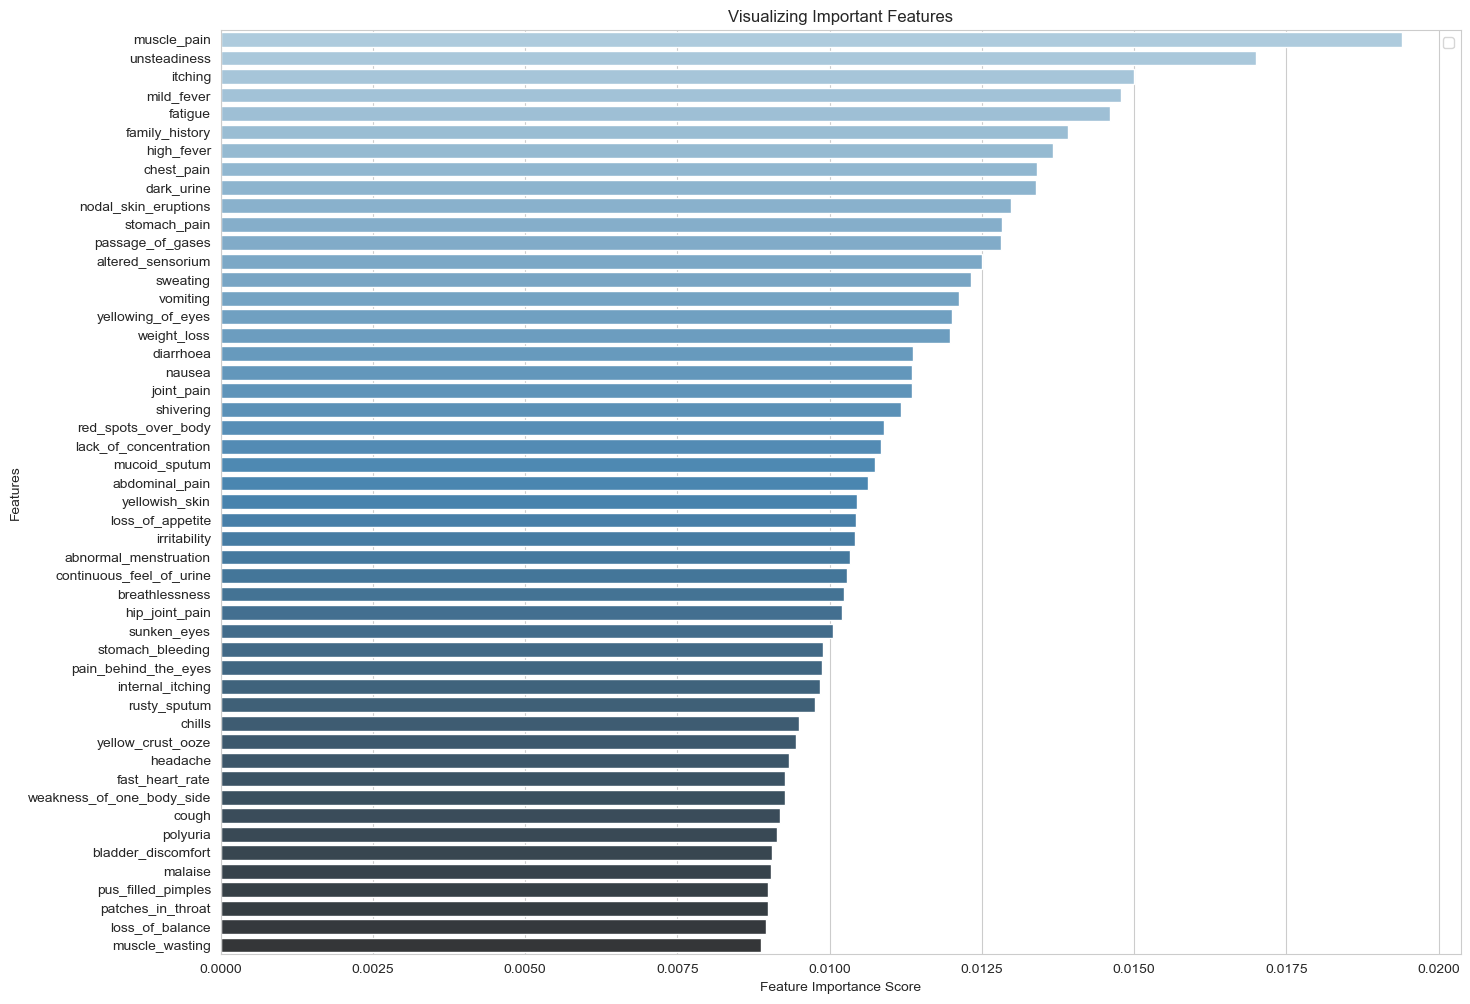

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.gcf()
fig.set_size_inches(16, 12)

# Creating a bar plot
sns.set_style("whitegrid")
sns.barplot(x=feature_imp, y=feature_imp.index, palette='Blues_d',color='white')

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [14]:
X_reduced, y = data[['receiving_blood_transfusion', 'red_sore_around_nose',
       'abnormal_menstruation', 'continuous_sneezing', 'breathlessness',
       'blackheads', 'shivering', 'dizziness', 'back_pain', 'unsteadiness',
       'yellow_crust_ooze', 'muscle_weakness', 'loss_of_balance', 'chills',
       'ulcers_on_tongue', 'stomach_bleeding', 'lack_of_concentration', 'coma',
       'neck_pain', 'weakness_of_one_body_side', 'diarrhoea',
       'receiving_unsterile_injections', 'headache', 'family_history',
       'fast_heart_rate', 'pain_behind_the_eyes', 'sweating', 'mucoid_sputum',
       'spotting_ urination', 'sunken_eyes', 'dischromic _patches', 'nausea',
       'dehydration', 'loss_of_appetite', 'abdominal_pain', 'stomach_pain',
       'yellowish_skin', 'altered_sensorium', 'chest_pain', 'muscle_wasting',
       'vomiting', 'mild_fever', 'high_fever', 'red_spots_over_body',
       'dark_urine', 'itching', 'yellowing_of_eyes', 'fatigue', 'joint_pain',
       'muscle_pain']], data.iloc[:,-1]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3) # 70% training and 30% test

In [15]:
X_reduced.head()

receiving_blood_transfusion  red_sore_around_nose  abnormal_menstruation  \
0                            0                     0                      0   
1                            0                     0                      0   
2                            0                     0                      0   
3                            0                     0                      0   
4                            0                     0                      0   

   continuous_sneezing  breathlessness  blackheads  shivering  dizziness  \
0                    0               0           0          0          0   
1                    0               0           0          0          0   
2                    0               0           0          0          0   
3                    0               0           0          0          0   
4                    0               0           0          0          0   

   back_pain  unsteadiness  ...  vomiting  mild_fever  high_fever  \
0          0             0  ...         0           0           0   
1          0             0  ...         0           0           0   
2          0             0  ...         0           0           0   
3          0             0  ...         0           0           0   
4          0             0  ...         0           0           0   

   red_spots_over_body  dark_urine  itching  yellowing_of_eyes  fatigue  \
0                    0           0        1                  0        0   
1                    0           0        0                  0        0   
2                    0           0        1                  0        0   
3                    0           0        1                  0        0   
4                    0           0        1                  0        0   

   joint_pain  muscle_pain  
0           0            0  
1           0            0  
2           0            0  
3           0            0  
4           0            0  

[5 rows x 50 columns]

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score
#Create a Gaussian Classifier
clf2=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(X_train,y_train)

y_pred=clf2.predict(X_test)

# Model Accuracy, how often is the classifier correct?
# Assuming you have already defined y_test and y_pred
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Using 'macro' or 'weighted' average with zero_division parameter
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)  # or 'weighted'
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)  # or 'weighted'
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)  # or 'weighted'

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9383468834688347
Precision: 0.9212044950210756
Recall: 0.9395217385174343
F1 Score: 0.9254833549350914


In [17]:
feature_imp2 = pd.Series(clf2.feature_importances_,index=list(X_reduced.columns)).sort_values(ascending=False)
feature_imp2[::-1]

sunken_eyes                       0.005679
pain_behind_the_eyes              0.007937
unsteadiness                      0.008017
dehydration                       0.008242
receiving_unsterile_injections    0.008335
lack_of_concentration             0.008936
ulcers_on_tongue                  0.008942
coma                              0.010229
receiving_blood_transfusion       0.010667
shivering                         0.010754
weakness_of_one_body_side         0.012032
stomach_bleeding                  0.012448
mucoid_sputum                     0.012692
red_sore_around_nose              0.012950
back_pain                         0.013015
dischromic _patches               0.013510
family_history                    0.014084
altered_sensorium                 0.014441
yellow_crust_ooze                 0.014678
muscle_wasting                    0.015630
dizziness                         0.016244
spotting_ urination               0.016350
breathlessness                    0.016613
stomach_pai

C:\Users\jeffpapa\AppData\Local\Temp\ipykernel_31812\2959618017.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_imp2, y=feature_imp2.index, palette='Blues_d',color='white')
C:\Users\jeffpapa\AppData\Local\Temp\ipykernel_31812\2959618017.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


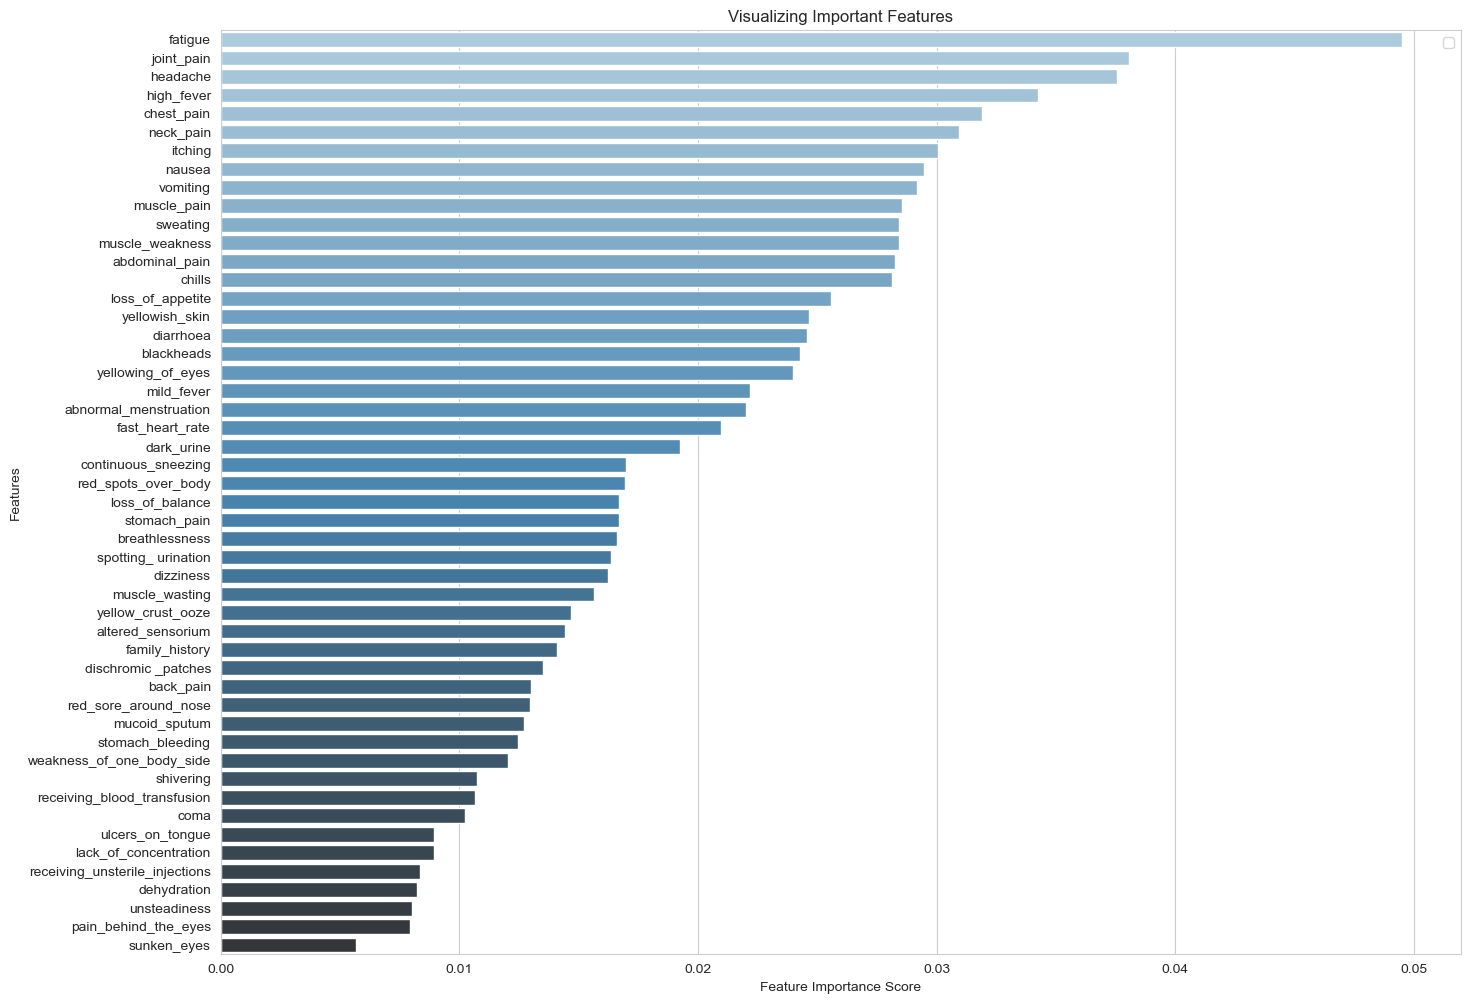

In [18]:
fig = plt.gcf()
fig.set_size_inches(16, 12)

# Creating a bar plot
sns.set_style("whitegrid")
sns.barplot(x=feature_imp2, y=feature_imp2.index, palette='Blues_d',color='white')

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [24]:
import joblib


In [27]:
joblib.dump(clf2, "disease prediction")

['disease prediction']